In [1]:
import pandas as pd # import for dataframe handle
import numpy as np # import for math and array operations
import matplotlib.pyplot as plt # import for visual representation
import seaborn as sns # import for visual representation

from bs4 import BeautifulSoup
import requests

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
import nltk

# pipeline imports
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# scalers, encoder, knn, vectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder



%load_ext autoreload
%autoreload 2

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pyfenix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pyfenix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pyfenix/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    lemmatizer = WordNetLemmatizer()
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words]# Remove Stop Words
#     lemmatized = [lemmatizer.lemmatize(word) for word in without_stopwords]
    
    return " ".join(without_stopwords)

In [4]:
def re_clean(text):
    text_t=[text].copy()
    temp=text_t[0].split(' ')
    non_imp_words=["game","games","gaming","studios","inc","studio"]
    for word in non_imp_words:
        while word in temp:
            temp.remove(word)
    return " ".join(temp)

 # Load Dataset 

In [5]:
df = pd.read_csv("../raw_data/clean_bigger_df.csv").drop(columns='Unnamed: 0').rename(columns={'clean_review':'reviews','mature_encoded':'mature_content','clean_description':'game_description'})
df.head()


,url,img_url,developer,requirements,name,metadata,game_description,pegi_url,mature_content,all_reviews,reviews
0,https://store.steampowered.com/app/10/CounterS...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,Valve,{},Counter-Strike,First- Shooter Violent+ Score Survival Team- P...,game play world number online action game enga...,NaN,0,"Overwhelmingly Positive(94,680)- 96% of the 94...",Overwhelmingly Positive
1,https://store.steampowered.com/app/1000000/ASC...,https://steamcdn-a.akamaihd.net/steam/apps/100...,IndigoBlue Game Studio,{'minimum': {'windows': {'processor': ' Intel ...,ASCENXION,Indie Stick about game Minimalist Controller2 ...,game ascenxion game combining shoot em adventu...,NaN,0,Winter 2020,Winter 2020
2,https://store.steampowered.com/app/1000010/Cro...,https://steamcdn-a.akamaihd.net/steam/apps/100...,NEXT Studios,{'minimum': {'windows': {'processor': ' Intel ...,Crown Trick,Replay Female Support Cards Magic+ Steam Value...,game crown trick beautifully animated rogue li...,NaN,0,"16 Oct, 2020","16 Oct, 2020"
3,https://store.steampowered.com/app/1000030/Coo...,https://steamcdn-a.akamaihd.net/steam/apps/100...,Vertigo Gaming Inc.,"{'minimum': {'windows': {'processor': '', 'mem...","Cook, Serve, Delicious! 3?!",Typing Play on controller Tablet Family Campai...,game hit road massive sequel million selling c...,https://steamstore-a.akamaihd.net/public/share...,1,Overwhelmingly Positive(761)- 96% of the 761 u...,Overwhelmingly Positive
4,https://store.steampowered.com/app/1000040/_/,https://steamcdn-a.akamaihd.net/steam/apps/100...,DoubleC Games,{},细胞战争,Indie Simulation+ Features Casual Action Singl...,game qq com,NaN,0,"30 Mar, 2019","30 Mar, 2019"


## Cleaning developer column

In [8]:
df['developer'] = df.developer.astype('str').apply(clean_text).apply(re_clean)
df.head()

,url,img_url,developer,requirements,name,metadata,game_description,pegi_url,mature_content,all_reviews,reviews
0,https://store.steampowered.com/app/10/CounterS...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,valve,{},Counter-Strike,First- Shooter Violent+ Score Survival Team- P...,game play world number online action game enga...,NaN,0,"Overwhelmingly Positive(94,680)- 96% of the 94...",Overwhelmingly Positive
1,https://store.steampowered.com/app/1000000/ASC...,https://steamcdn-a.akamaihd.net/steam/apps/100...,indigoblue,{'minimum': {'windows': {'processor': ' Intel ...,ASCENXION,Indie Stick about game Minimalist Controller2 ...,game ascenxion game combining shoot em adventu...,NaN,0,Winter 2020,Winter 2020
2,https://store.steampowered.com/app/1000010/Cro...,https://steamcdn-a.akamaihd.net/steam/apps/100...,next,{'minimum': {'windows': {'processor': ' Intel ...,Crown Trick,Replay Female Support Cards Magic+ Steam Value...,game crown trick beautifully animated rogue li...,NaN,0,"16 Oct, 2020","16 Oct, 2020"
3,https://store.steampowered.com/app/1000030/Coo...,https://steamcdn-a.akamaihd.net/steam/apps/100...,vertigo,"{'minimum': {'windows': {'processor': '', 'mem...","Cook, Serve, Delicious! 3?!",Typing Play on controller Tablet Family Campai...,game hit road massive sequel million selling c...,https://steamstore-a.akamaihd.net/public/share...,1,Overwhelmingly Positive(761)- 96% of the 761 u...,Overwhelmingly Positive
4,https://store.steampowered.com/app/1000040/_/,https://steamcdn-a.akamaihd.net/steam/apps/100...,doublec,{},细胞战争,Indie Simulation+ Features Casual Action Singl...,game qq com,NaN,0,"30 Mar, 2019","30 Mar, 2019"


# Preprocessing

In [46]:
def kmeans_labels(df, n , m):
    vec = TfidfVectorizer(min_df = m )
    X = vec.fit_transform(df['metadata'])
    kmodel = KMeans(n_clusters=n)
    kmodel.fit(X)
    
    return kmodel.labels_

In [114]:
def create_pipeline(df, m=0.05 , c=1, n =10, mi = 0.04, mii=0.02):
    array_transf = FunctionTransformer(lambda array: array.toarray())
    df['cluster'] = kmeans_labels(df, n, m)
    
    dev_transf=make_pipeline(
        TfidfVectorizer(min_df=mii),
        array_transf,
        RobustScaler()
    )
    
    desc_transf=make_pipeline(
        TfidfVectorizer(min_df = mi ,ngram_range=(1,2)),
        array_transf,
        RobustScaler()
    )
    
#     meta_transf = make_pipeline(
#         TfidfVectorizer(min_df=m), 
#         array_transf,
#         RobustScaler()
#     )
    
    ord_encoder = OrdinalEncoder(
        categories=[
            [
                "Overwhelmingly Negative",
                "Very Negative",
                "Negative",
                "Mostly Negative",
                'Mixed',
                "Mostly Positive",
                "Positive",
                "Very Positive",
                "Overwhelmingly Positive"
            ]],
        dtype=np.int64,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )
    
    ord_transf = make_pipeline(
        ord_encoder, 
        StandardScaler())
    
    cluster_transf = make_pipeline(
        OneHotEncoder(sparse=False), 
         StandardScaler()
    )
    
    num_transf = make_pipeline(StandardScaler())


    preproc_basic = make_column_transformer(
#         (meta_transf, 'metadata'),
        (dev_transf, 'developer'),
        (cluster_transf, ['cluster']),
        (ord_transf, ['reviews']),
        (num_transf, ['mature_content']),
        (desc_transf, 'game_description'),
        remainder='drop'
    )
    
    full_pipe = make_pipeline(preproc_basic, PCA(n_components=c) )
    return full_pipe.fit_transform(df)
    
    #return preproc_basic.fit_transform(df)

In [115]:
def train(X, y):
    return KNeighborsRegressor().fit(X,y)

In [116]:
def recommending_system(model, X, game):
    
    neighbors_index = model.kneighbors(X.loc[[game]],n_neighbors=df.shape[0])[1][0]
    neighbors_distance = model.kneighbors(X.loc[[game]],n_neighbors=df.shape[0])[0][0]
    
    neighbors_list = list(neighbors_index)
    
    # new_df_values = {
    #     'distance': neighbors_distance,
    #     'url': [],
    #     'price': [],
    #     'reviews': [],
    #     'op_sys': [],
    #     'developer': [],
    # }
    
    # for index in neighbors_index:
    #     new_df_values['url'].append(df.loc[index, 'url'])
    #     new_df_values['price'].append(df.loc[index, 'price'])
    #     new_df_values['reviews'].append(df.loc[index, 'reviews'])
    #     new_df_values['op_sys'].append(df.loc[index, 'op_sys'])
    #     new_df_values['developer'].append(df.loc[index, 'developer'])
    
    return pd.DataFrame(neighbors_distance, index = X.iloc[neighbors_list, :].index, columns=['distance'])

In [117]:
pipe = create_pipeline(df, 0.03, 1, 10, 0.04,0.02)
pipe.shape
X = pd.DataFrame(pipe, index=df.name.tolist())
model = train(X, df['url'])


In [118]:
recommending_system(model, X, 'Left 4 Dead').head(10)

,distance
Left 4 Dead,0.000000
Land War,0.000320
Surabaya Inferno,0.000349
Interworlds,0.000427
Guardian Of December,0.000714
Incitement 3,0.000828
Trial by Viking,0.001142
Enlightenment,0.001289
Grimshade,0.001528
Grapple,0.001565


In [119]:
recommending_system(model, X, 'S.T.A.L.K.E.R.: Shadow of Chernobyl').head(10)

,distance
S.T.A.L.K.E.R.: Shadow of Chernobyl,0.000000
JUJU,0.000121
EARTHLOCK,0.000127
Numgeon,0.000624
Doctor Who: The Edge Of Time,0.001078
Will of the Gods,0.001134
Valkyrie's Arrow | 瓦尔基丽的箭,0.001215
Spaceship Commander,0.001604
Magical Battle Festa,0.001665
Monovert DX,0.001667


In [120]:
recommending_system(model, X, 'QUAKE').head(10)

,distance
QUAKE,0.000000
The Minotaur,0.000019
Super Island God VR,0.000048
Fill all,0.000248
10 Second Ninja X,0.000779
Dawn of Fear,0.000891
Dig to the Stars,0.000951
The Amazing Bernard,0.000979
Power & Revolution 2019 Edition,0.001091
Mesmer,0.001216


# Testing Data

In [121]:
user_df = pd.read_csv('../raw_data/steam-200k.csv',usecols=[0,1,2,3],names=['userid','game','behavior','hoursplayed'])

In [122]:
# keeping only play entries

df_play = user_df[user_df['behavior']=='play']
df_play=df_play.drop(columns='behavior')

#keeping only games that are also in the main dataset
user_name= pd.DataFrame(df_play['game'].unique(),columns=['name']).merge(df, on = 'name')
join_name = list(user_name.name.unique())
df_play = df_play[df_play['game'].isin(join_name)]

In [123]:
# Creating DF of users favorites 2 games

def get_fav_games(df,user):
    db = df[df['userid']==user].sort_values(by='hoursplayed', ascending=False)
    return list(db['game'].iloc[0:2])

def get_user_list(df):
    temp_df=df.groupby('userid').count()[['game']]
    return list(temp_df[temp_df['game']>1].index)

def get_fav_list(df):
    user_list= get_user_list(df)
    fav_list=[]
    for user in user_list:
        fav_list.append(get_fav_games(df,user))
    fav1=[]
    fav2=[]
    for fav in fav_list:
        fav1.append(fav[0])
        fav2.append(fav[1])
    return pd.DataFrame(data=list(zip( fav1, fav2)),
                         columns=['most_fav_game', 'sec_fav_game'],index=user_list)

In [135]:
test_df = get_fav_list(df_play)

In [125]:
def testing_models(df, model):

    df['distance'] = ''
    for index, row in df.iterrows():
        neighbors_list = list(model.kneighbors(X.loc[[row['most_fav_game']]],n_neighbors=X.shape[0])[1][0])
        res = pd.DataFrame(model.kneighbors(X.loc[[row['most_fav_game']]],n_neighbors=X.shape[0])[0][0],\
                           index = X.iloc[neighbors_list, :]\
                        .index, columns = ['distance']).loc[row['sec_fav_game']][0]
        df.loc[index, 'distance'] = res
        
    return df

# Testing Params

In [126]:
def test_params(test_df,df, X, model, name, index_name):
    for index, row in test_df.iterrows():
        neighbors_list = list(model.kneighbors(X.loc[[row['most_fav_game']]],n_neighbors=df.shape[0])[1][0])
        res = pd.DataFrame(model.kneighbors(X.loc[[row['most_fav_game']]],n_neighbors=df.shape[0])[0][0],\
                           index = X.iloc[neighbors_list, :]\
                        .index, columns = [name])
        test_df.loc[index, name] = res.loc[row['sec_fav_game']][0]
        test_df.loc[index, index_name]= res.index.get_loc(row['sec_fav_game'])
    return test_df

In [127]:
def check_params(df, m=0.05 , c=1, n =50, mi = 0.1):
    pipe = create_pipeline(df, m=0.05 , c=1, n =50, mi = 0.04)
    X = pd.DataFrame(pipe, index=df.name.tolist())
    model = train(X, df['url'])
    name = str(m)
    index_name = 'index' + str(m)
    test_params(test_df,df, X, model, name, index_name)
    return test_df

In [128]:
m_list = [0.03, 0.05, 0.07]
c_list = [1,5]
n_list = [8, 10, 15,20]
mi_list = [0.05, 0.07,0.1]
mii_list=[0.01,0.02,0.03]

In [129]:
main_list = [m_list, c_list, n_list, mi_list, mii_list]

In [130]:
import itertools
params_list = list(itertools.product(*main_list))
len(params_list)

216

In [136]:
# fun loop to go through! again and again...
count=24
for params in params_list[25:125]:
    check_params(df, params)
    count +=1
    print(count)

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [137]:
test_df.shape

(3184, 202)

In [138]:
test_df.to_csv("../raw_data/further_25_124.csv")

In [32]:
vec = TfidfVectorizer(min_df = 0.05).fit(df.metadata)

vectors = vec.transform(df.metadata) # Transform text to vectors
sum_tfidf = vectors.sum(axis=0) # Sum of tfidf weighting by word
tfidf_list = [(word, sum_tfidf[0, idx]) for word, idx in     vec.vocabulary_.items()]  # Get the word and associated weight
#sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)  # Sort
#sorted_tfidf_list

In [33]:
X_proj = pd.DataFrame(vectors.toarray(), index=df.name.tolist())

km = KMeans(n_clusters=3)
km.fit(X_proj)

KMeans(n_clusters=3)

Text(0.5, 0, 'k cluster number')

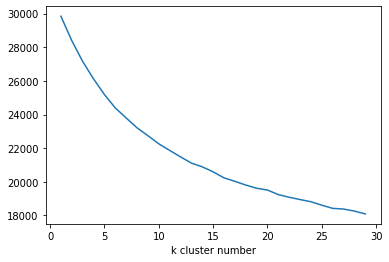

In [34]:
inertias = []
ks = range(1,30)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [31]:
X_proj

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Counter-Strike,0.000000,0.000000,0.000000,0.000000,0.130275,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.270873,0.0,0.0,0.0
ASCENXION,0.000000,0.255575,0.000000,0.000000,0.105959,0.111240,0.000000,0.0,0.000000,0.183391,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Crown Trick,0.000000,0.000000,0.000000,0.107776,0.112775,0.118396,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.159289,0.249383,0.276392,0.000000,0.0,0.0,0.0
"Cook, Serve, Delicious! 3?!",0.000000,0.000000,0.000000,0.090563,0.094764,0.000000,0.000000,0.0,0.195614,0.000000,...,0.0,0.000000,0.199144,0.133849,0.000000,0.000000,0.000000,0.0,0.0,0.0
细胞战争,0.000000,0.000000,0.000000,0.000000,0.315842,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Becalm,0.000000,0.000000,0.000000,0.000000,0.000000,0.142689,0.000000,0.0,0.000000,0.235238,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Enemy On Board,0.177477,0.000000,0.174548,0.000000,0.101142,0.106183,0.182306,0.0,0.000000,0.000000,...,0.0,0.180762,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Bruken,0.000000,0.000000,0.000000,0.000000,0.000000,0.370653,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Fantasy Sino-Japanese War 幻想甲午,0.000000,0.000000,0.318560,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
inertias = []
ks = range(1,100)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')